In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_auc_score, accuracy_score, mean_squared_error, f1_score, precision_score, recall_score, confusion_matrix, mean_squared_log_error
import lightgbm as lgb
import xgboost as xgb
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [11]:
# Clean Data Modeling
df_master = pd.read_csv("Master3_Anton_classification.csv")

In [12]:
df_master.drop(["Unnamed: 0","trend_average"],axis=1,inplace=True)

In [13]:
df_master = df_master.rename(columns={"wrong budget":"inflation budget"})

In [9]:
pd.set_option('display.max_columns', 500)

In [10]:
df_master.head()

,budget,runtime,cast_count,Top3cast_avg_rev,director_avg_revenue,director_avg_vote,Director_Number,country_count,company_count,genre_count,budget_relative_2020,trend_average,awardedcast,book,sequal,isenglish,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,ScienceFiction,TVMovie,Thriller,War,Western,Afghanistan,Algeria,Angola,Argentina,Aruba,Australia,Austria,Bahamas,Belgium,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Bulgaria,Cambodia,Cameroon,Canada,Chile,China,Colombia,Cyprus,Czech Republic,Denmark,Dominica,Dominican Republic,Ecuador,Egypt,Fiji,Finland,France,Germany,Greece,Guadaloupe,Guyana,Hong Kong,Hungary,Iceland,India,Indonesia,Iran,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kyrgyz Republic,Lebanon,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Malaysia,Malta,Mexico,Monaco,Morocco,Netherlands,New Zealand,Nigeria,Norway,Pakistan,Panama,Peru,Philippines,Poland,Portugal,Romania,Russia,Serbia,Serbia and Montenegro,Singapore,Slovakia,Slovenia,South Africa,South Korea,Spain,Sweden,Switzerland,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States of America,company_Amblin Entertainment,company_BBC Films,company_Canal+,company_Castle Rock Entertainment,company_Columbia Pictures,company_Columbia Pictures Corporation,company_Davis Entertainment,company_Dimension Films,company_DreamWorks Animation,company_DreamWorks SKG,company_Dune Entertainment,company_Dune Entertainment III,company_Epsilon Motion Pictures,company_Film4,company_Focus Features,company_Fox 2000 Pictures,company_Fox Searchlight Pictures,company_Happy Madison Productions,company_Imagine Entertainment,company_Ingenious Film Partners,company_Lakeshore Entertainment,company_Legendary Pictures,company_Lions Gate Films,company_Lionsgate,company_Metro-Goldwyn-Mayer (MGM),company_Miramax Films,company_New Line Cinema,company_New Regency Pictures,company_Original Film,company_Paramount Pictures,company_Regency Enterprises,company_Relativity Media,company_Scott Free Productions,company_Scott Rudin Productions,company_Screen Gems,company_Silver Pictures,company_Spyglass Entertainment,company_Studio Babelsberg,company_StudioCanal,company_Summit Entertainment,company_TSG Entertainment,company_The Weinstein Company,company_Touchstone Pictures,company_TriStar Pictures,company_Twentieth Century Fox Film Corporation,company_UK Film Council,company_United Artists,company_Universal Pictures,company_Village Roadshow Pictures,company_Walt Disney Pictures,company_Warner Bros.,company_Working Title Films,company_others,release_month_1,release_month_2,release_month_3,release_month_4,release_month_5,release_month_6,release_month_7,release_month_8,release_month_9,release_month_10,release_month_11,release_month_12,inflation budget,revenue
0,237000000,162.0,83,4.552374e+08,5.743502e+08,7.328571,1,3,4,4,2.914683e+08,23.688742,0.0,0.0,0.0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1.927105e+08,2787965087
1,250000000,153.0,49,5.311322e+08,6.073523e+08,6.766667,1,3,2,3,3.074560e+08,14.258278,0.0,1.0,0.0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,2.032811e+08,933959197
2,150000000,150.0,37,4.077487e+08,3.793412e+08,6.400000,1,2,7,3,1.844736e+08,9.602649,0.0,0.0,1.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [14]:
X = df_master.drop("revenue",axis=1)

In [15]:
df_master['profit'] = df_master["revenue"] - 3 * df_master["budget"]
df_master["target"] = df_master["profit"].apply(lambda x: 1 if x >= 0 else 0)
df_master["target"].value_counts()

0    1943
1    1279
Name: target, dtype: int64

In [16]:
y = df_master["target"]

In [17]:
X_scaled_std = StandardScaler().fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_std,y, random_state=0)

In [19]:
#grid of parameters
#gridParams = {
#    'learning_rate': [0.01,0.02,0.03,0.04,0.05],
#    'num_leaves': [90,150,200],
#    'boosting_type' : ['gbdt'],
#    'objective' : ['binary'],
#    'max_depth' : [5,6,7,8],
#    'random_state' : [501], 
#    'colsample_bytree' : [0.5,0.7],
#    'subsample' : [0.5,0.7],
#    'min_split_gain' : [0.01],
#    'min_data_in_leaf':[10],
#    'metric':['auc']
#    }

#clf = lgb.LGBMRegressor()
#grid = GridSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1)
#grid.fit(X_train,y_train)

#grid.best_params_

In [20]:
gridParams = {
    'boosting_type': ['gbdt'],
    'colsample_bytree': [0.7],
    'learning_rate': [0.05],
    'max_depth': [6],
    'metric': ['auc'],
    'min_data_in_leaf': [10],
    'min_split_gain': [0.01],
    'num_leaves': [90],
    'objective': ['binary'],
    'random_state': [501],
    'subsample': [0.5]}

clf = lgb.LGBMRegressor()
grid = GridSearchCV(clf,gridParams,verbose=1,cv=10,n_jobs = -1)
grid.fit(X_train,y_train)

grid.best_params_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    3.7s finished


{'boosting_type': 'gbdt',
 'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 6,
 'metric': 'auc',
 'min_data_in_leaf': 10,
 'min_split_gain': 0.01,
 'num_leaves': 90,
 'objective': 'binary',
 'random_state': 501,
 'subsample': 0.5}

In [21]:
#Prediction
y_pred = grid.predict(X_test)

In [22]:
# Check best threshold
threshold_value = []
accuracy_value = []
y_pred2 = []
for i in np.linspace(0,1,100):
    
    threshold = i
    for z in range(X_test.shape[0]):
        if y_pred[z] >= threshold:       
            y_pred2.append(1)
        else:  
            y_pred2.append(0)
        
    threshold_value.append(i)
   
    accuracy_value.append(accuracy_score(y_pred2,y_test))
    y_pred2 = []
df_threshold = pd.DataFrame(list(zip(threshold_value,accuracy_value)), columns=["threshold","accuracy"])

df_threshold[df_threshold["accuracy"] ==  df_threshold["accuracy"].max()]

,threshold,accuracy
45,0.454545,0.810174
47,0.474747,0.810174


In [14]:
# setting threshold to number
y_pred2 = []
threshold = 0.474747
for i in range(X_test.shape[0]):
    if y_pred[i] >= threshold:       
       y_pred2.append(1)
    else:  
       y_pred2.append(0)

In [15]:
# Evaluation metricks
print('AUC of LGB classifier on test set:{:.3f}\n'.format(roc_auc_score(y_test,y_pred)))
print('Accuracy of LGB  classifier on test set: {:.3f}\n'.format(accuracy_score(y_test,y_pred2)))
print('Precision of LGB  classifier on test set: {:.3f}\n'.format(precision_score(y_test,y_pred2)))
print('Recall of LGB  classifier on test set: {:.3f}\n'.format(recall_score(y_test,y_pred2)))
print('F1_score of LGB  classifier on test set: {:.3f}\n'.format(f1_score(y_test,y_pred2)))
print("Confusion matrix\n", confusion_matrix(y_test,y_pred2))

AUC of LGB classifier on test set:0.884

Accuracy of LGB  classifier on test set: 0.815

Precision of LGB  classifier on test set: 0.745

Recall of LGB  classifier on test set: 0.782

F1_score of LGB  classifier on test set: 0.763

Confusion matrix
 [[417  82]
 [ 67 240]]


Text(0, 0.5, 'Feature Importance Score')

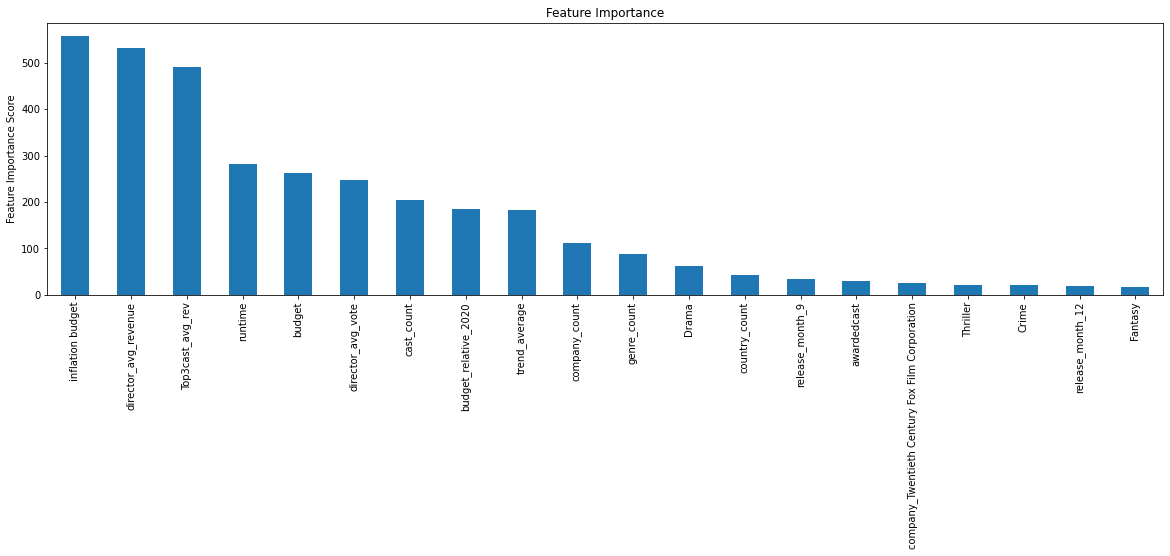

In [16]:
#Feature importance for top 50 predictors
predictors = [x for x in X.columns]
feat_imp = pd.Series(grid.best_estimator_.feature_importances_, predictors).sort_values(ascending=False)
feat_imp = feat_imp[0:20]
plt.rcParams['figure.figsize'] = 20, 5
feat_imp.plot(kind='bar', title='Feature Importance')
plt.ylabel('Feature Importance Score')